In [127]:
import pandas as pd 
from os import listdir
import os
import matplotlib.pyplot as plt
from scipy import stats
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False, figsize=(30, 8))

In [1]:
open("BSWUSAM000000191362.vcf").readlines()

['##fileformat=VCFv4.1\n',
 '##FILTER=<ID=LowQual,Description="Low quality">\n',
 '##FORMAT=<ID=AD,Number=.,Type=Integer,Description="Allelic depths for the ref and alt alleles in the order listed">\n',
 '##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Approximate read depth (reads with MQ=255 or with bad mates are filtered)">\n',
 '##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">\n',
 '##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">\n',
 '##FORMAT=<ID=PL,Number=G,Type=Integer,Description="Normalized, Phred-scaled likelihoods for genotypes as defined in the VCF specification">\n',
 '##GATKCommandLine=<ID=UnifiedGenotyper,Version=2.7-4-g6f46d11,Date="Wed Apr 23 22:25:30 CEST 2014",Epoch=1398284730713,CommandLineOptions="analysis_type=UnifiedGenotyper input_file=[/home/users-groups/upwroclaw/G2F/outputs_Mielczarek/posrednie/vcf_z_GATK/BSWUSAM000000191362/BSWUSAM000000191362.recalibrated.bam] read_buffer_size=null phone_home=AWS gatk_key=null tag=NA re

In [128]:
file1 = 'BSWUSAM000000191362_DEPTH/'
file1_before = 'BSWUSAM000000191362_BEFORE/'
file2 = 'BSWUSAM000000193323_DEPTH/'
file2_before = 'BSWUSAM000000193323_BEFORE/'

files1 = sorted([f for f in listdir(file1)])
files1_before = sorted([f for f in listdir(file1_before)])
files2 = sorted([f for f in listdir(file2)])
files2_before = sorted([f for f in listdir(file2_before)])
len(files1), len(files1_before), len(files2), len(files2_before)

(1240, 1240, 1316, 1316)

# 62

In [74]:
df_62IN = pd.DataFrame()
files = []

for i in range(len(files1)):
    file = file1+files1[i]
    df_new = pd.read_csv(file, sep="\t", names=['Chr', "Place", "Depth"] )
    df_62IN = df_62IN.append(df_new)
    files.extend([i for j in range(len(df_new))])
    
df_62IN['File'] = files
df_62IN.head()

,Chr,Place,Depth,File
0,Chr1,113199801,22,0
1,Chr1,113199802,22,0
2,Chr1,113199803,23,0
3,Chr1,113199804,23,0
4,Chr1,113199805,24,0


In [77]:
df_62BEFORE = pd.DataFrame()
files = []

for i in range(len(files1_before)):
    file = file1_before+files1_before[i]
    df_new = pd.read_csv(file, sep="\t", names=['Chr', "Place", "Depth"] )
    df_62BEFORE = df_62BEFORE.append(df_new)
    files.extend([i for j in range(len(df_new))])
    
df_62BEFORE['File'] = files
df_62BEFORE.head()

,Chr,Place,Depth,File
0,Chr1,113199301,6,0
1,Chr1,113199302,6,0
2,Chr1,113199303,6,0
3,Chr1,113199304,6,0
4,Chr1,113199305,6,0


In [78]:
df_62IN = df_62IN[df_62IN.File.isin(df_62BEFORE.File)]
len(df_62BEFORE.File.unique()), len(df_62IN.File.unique())

(1230, 1230)

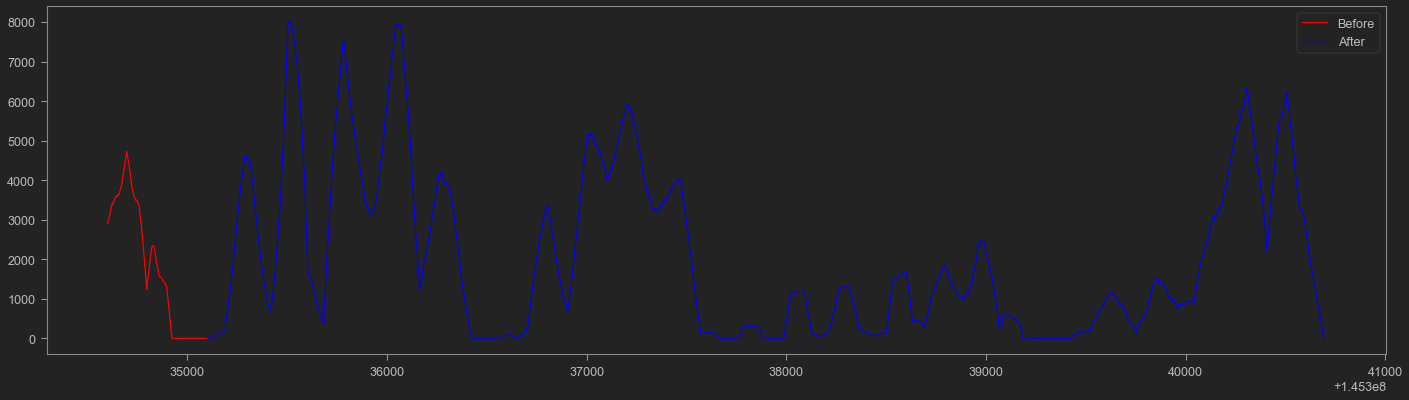

In [137]:
def plot(number_of_file):
    sub_df1 = df_62BEFORE[df_62BEFORE.File==number_of_file]
    sub_df2 = df_62IN[df_62IN.File==number_of_file]
    plt.plot(sub_df1.Place, sub_df1.Depth, color="red")
    plt.plot(sub_df2.Place, sub_df2.Depth,color="blue")
    plt.legend(["Before", "After"])
plot(8)

In [130]:
df_62BEFORE.Depth.max(), df_62IN.Depth.max()

(5827, 8001)

In [131]:
idx = df_62BEFORE.File.unique()
means_before62 = []
means_in62 = []

for i in idx:
    sub_df_before = df_62BEFORE[df_62BEFORE.File==i]
    sub_df_in = df_62IN[df_62IN.File==i]
    means_before62.append(sub_df_before.Depth.mean())
    means_in62.append(sub_df_in.Depth.mean())

Text(0.5, 0, 'Duplikacje')

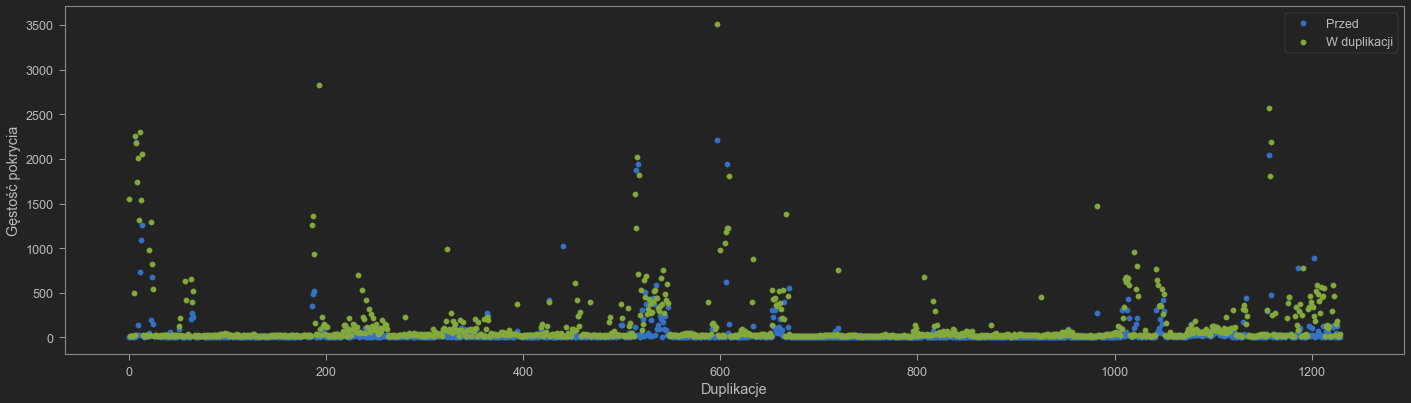

In [141]:
# plt.ylim(0,1000)
plt.scatter([i for i in range(len(means_before62))], means_before62)
plt.scatter([i for i in range(len(means_before62))], means_in62)
plt.legend(["Przed", "W duplikacji"])
plt.ylabel("Gęstość pokrycia")
plt.xlabel("Duplikacje")

Text(0.5, 0, 'Duplikacje')

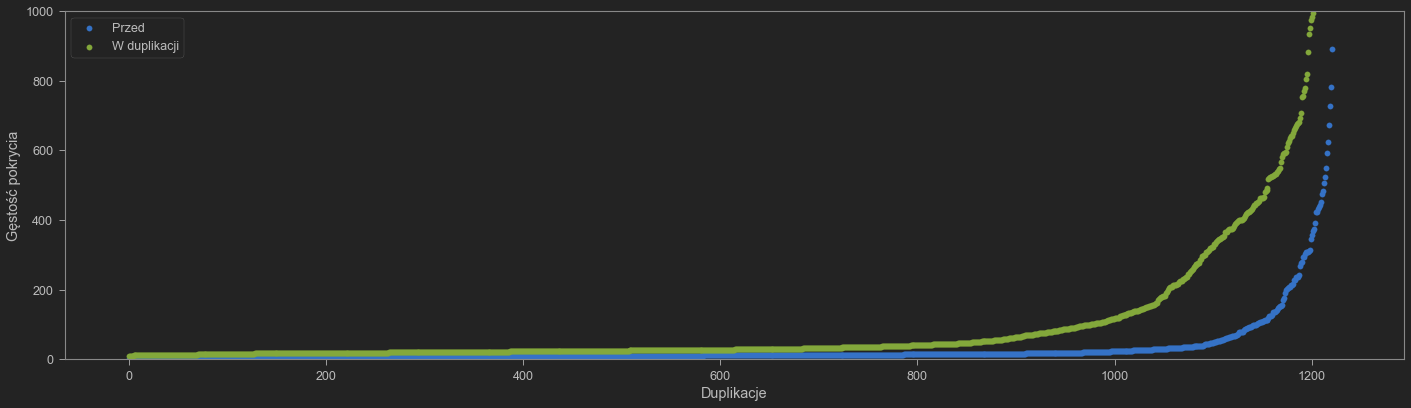

In [153]:
plt.ylim(0,1000)
plt.scatter([i for i in range(len(means_before62))], sorted(means_before62))
plt.scatter([i for i in range(len(means_before62))], sorted(means_in62))
plt.legend(["Przed", "W duplikacji"])
plt.ylabel("Gęstość pokrycia")
plt.xlabel("Duplikacje")

In [159]:
import numpy as np

(array([1.182e+03, 2.700e+01, 8.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 3.000e+00]),
 array([1.00000000e+00, 2.22522193e+02, 4.44044385e+02, 6.65566578e+02,
        8.87088770e+02, 1.10861096e+03, 1.33013316e+03, 1.55165535e+03,
        1.77317754e+03, 1.99469973e+03, 2.21622193e+03]),
 <a list of 10 Patch objects>)

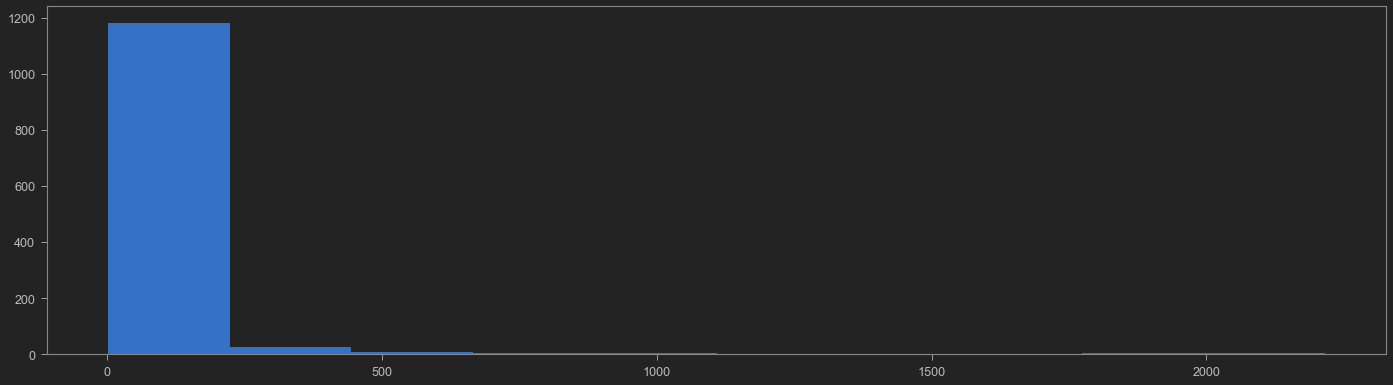

In [167]:
plt.hist(means_before62, bins=10)

In [117]:
means_before62.index(max(means_before62)), means_before62[597]

(597, 2216.2219251336896)

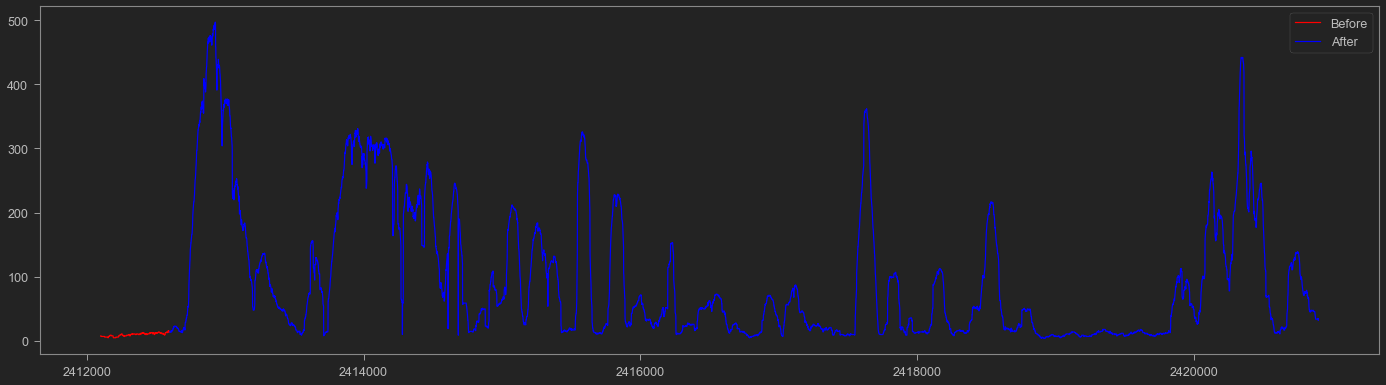

In [139]:
plot(597)

In [105]:
stats.ttest_rel(means_before62, means_in62)

Ttest_relResult(statistic=-11.65535687714041, pvalue=7.506241884548722e-30)

In [106]:
len(df_62BEFORE.File.unique()), len(df_62IN.File.unique())

(1230, 1230)

# 23

In [47]:
df_23IN = pd.DataFrame()
files = []

for i in range(len(files2)):
    file = file2+files2[i]
    df_new = pd.read_csv(file, sep="\t", names=['Chr', "Place", "Depth"] )
    df_23IN = df_23IN.append(df_new)
    files.extend([i for j in range(len(df_new))])
    
df_23IN['File'] = files
df_23IN.head()

,Chr,Place,Depth,File
0,Chr1,110746901,17,0
1,Chr1,110746902,17,0
2,Chr1,110746903,18,0
3,Chr1,110746904,18,0
4,Chr1,110746905,18,0


In [45]:
df_23BEFORE = pd.DataFrame()
files = []

for i in range(len(files2_before)):
    file = file2_before+files2_before[i]
    df_new = pd.read_csv(file, sep="\t", names=['Chr', "Place", "Depth"] )
    df_23BEFORE = df_23BEFORE.append(df_new)
    files.extend([i for j in range(len(df_new))])
    
df_23BEFORE['File'] = files
df_23BEFORE.head()

,Chr,Place,Depth,File
0,Chr1,110746401,12,0
1,Chr1,110746402,12,0
2,Chr1,110746403,13,0
3,Chr1,110746404,13,0
4,Chr1,110746405,13,0


In [50]:
df_23IN = df_23IN[df_23IN.File.isin(df_23BEFORE.File)]
len(df_23BEFORE.File.unique()), len(df_23IN.File.unique())

In [57]:
df_23BEFORE.Depth.max(), df_23IN.Depth.max()

(6583, 8003)

In [146]:
idx = df_23BEFORE.File.unique()
means_before23 = []
means_in23 = []

for i in idx:
    sub_df_before = df_23BEFORE[df_23BEFORE.File==i]
    sub_df_in = df_23IN[df_23IN.File==i]
    means_before23.append(sub_df_before.Depth.mean())
    means_in23.append(sub_df_in.Depth.mean())

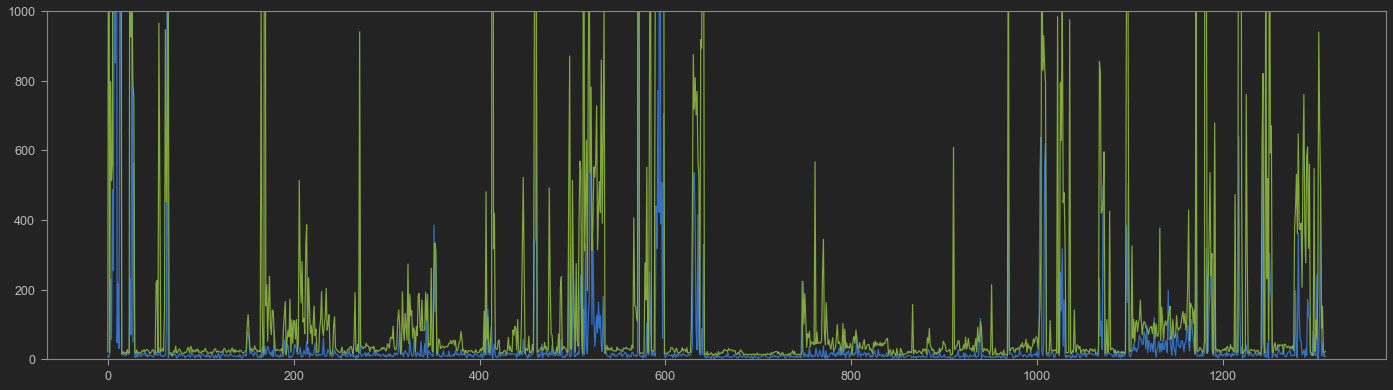

In [147]:
plt.ylim(0,1000)
plt.plot(means_before23)
plt.plot(means_in23)

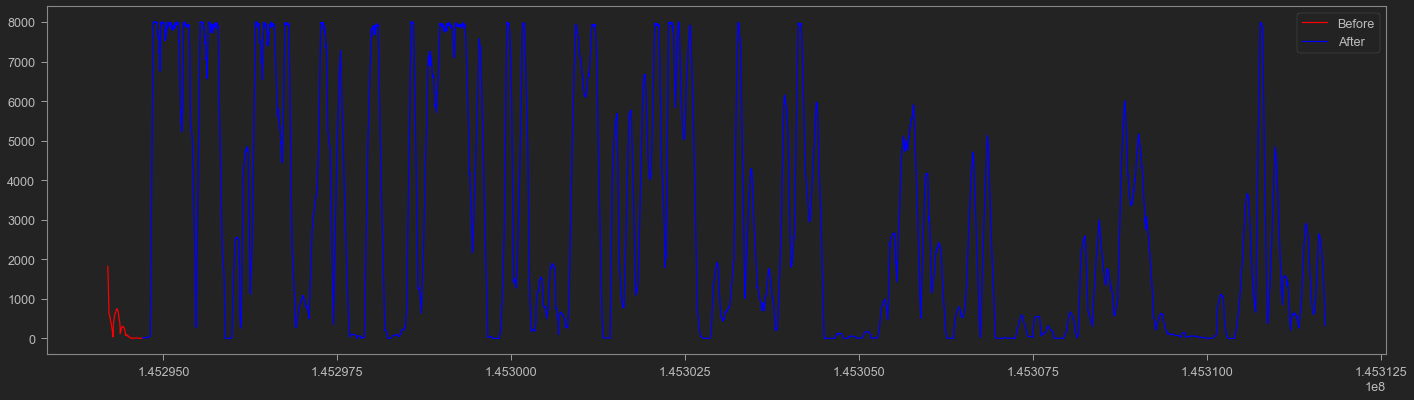

In [150]:
def plot(number_of_file):
    sub_df1 = df_23BEFORE[df_23BEFORE.File==number_of_file]
    sub_df2 = df_23IN[df_23IN.File==number_of_file]
    plt.plot(sub_df1.Place, sub_df1.Depth, color="red")
    plt.plot(sub_df2.Place, sub_df2.Depth,color="blue")
    plt.legend(["Before", "After"])
plot(6)

In [149]:
stats.ttest_rel(means_before23, means_in23)

Ttest_relResult(statistic=-11.233658259708273, pvalue=5.079670858094835e-28)